<a href="https://colab.research.google.com/github/cipher499/statistics_demos/blob/main/chi_square_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-Square distribution

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# draw five samples of size 100 from a normal distribution (mean=0, std=1)
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)
sample3 = np.random.normal(loc=0, scale=1, size=100)
sample4 = np.random.normal(loc=0, scale=1, size=100)
sample5 = np.random.normal(loc=0, scale=1, size=100)

In [ ]:
# compute the chi-square statistic from k=1 to k=5
x = sample1**2
y = sample1**2 + sample2**2
z = sample1**2 + sample2**2 + sample3**2
u = sample1**2 + sample2**2 + sample3**2 + sample4**2
v = sample1**2 + sample2**2 + sample3**2 + sample4**2 + sample5**2

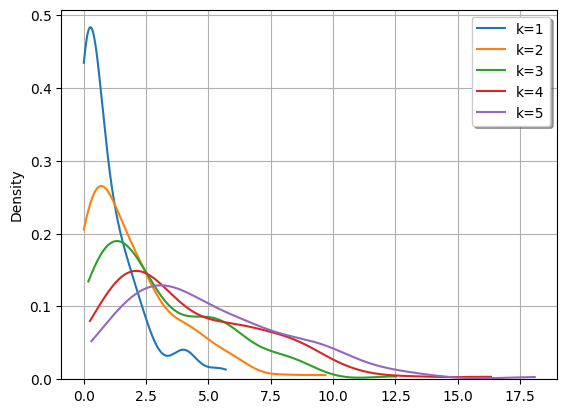

In [ ]:
# plot the five chi-squared statistics
sns.kdeplot(x, clip=(x.min(), x.max()), label='k=1')
sns.kdeplot(y, clip=(y.min(), y.max()), label='k=2')
sns.kdeplot(z, clip=(z.min(), z.max()), label='k=3')
sns.kdeplot(u, clip=(u.min(), u.max()), label='k=4')
sns.kdeplot(v, clip=(v.min(), v.max()), label='k=5')
plt.legend(shadow=True)
plt.grid()

- p-value calculation from a chi-square distribution given the degree of freedom and the value of the chi square statistic.

In [ ]:
import scipy.stats as stats

chi_squared = 1
dof = 5

p_value = stats.chi2.sf(chi_squared, dof)

print("The p-value is: ", p_value)

The p-value is:  0.9625657732472964


## Goodness of fit (gof) test

In [ ]:
from scipy.stats import chisquare
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# get the observed frequencies
class_freq = df['Pclass'].value_counts().sort_index()
class_freq

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [ ]:
# get the expected frequencies assuming uniform distribution
expected_freq = len(df['Pclass']) / 3
expected_freq = [expected_freq] * 3
expected_freq

[297.0, 297.0, 297.0]

In [ ]:
# calculate the test statistic and the p-value
chi_stats, p_value = chisquare(class_freq, expected_freq)
chi_stats, p_value

(191.8047138047138, 2.2394202231028854e-42)

In [ ]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")


We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


## Test for independence

In [ ]:
from scipy.stats import chi2_contingency

# compute the contingency table for all observations between the two variables
c_table = pd.crosstab(df['Pclass'], df['Survived'])
c_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
# calculate the chi square statistic and the p value
chi2_statistic, p_value, dof, expected_table = chi2_contingency(c_table)

print("Chi-square statistic: ", chi2_statistic)
print("p_value: ", p_value)
print("degree of freedom: ", dof)
print("expected contingency table ", expected_table)

Chi-square statistic:  102.88898875696056
p_value:  4.549251711298793e-23
degree of freedom:  2
expected contingency table  [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [ ]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between the passenger class and the survival rate. ")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between the passenger class and the survival rate.")


We reject the null hypothesis. There is a significant association between the passenger class and the survival rate. 
